In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
from keras.layers import Activation
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import layers

In [ ]:
import matplotlib.pyplot as plt

In [43]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [42]:

epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/15


ValueError: ignored

In [ ]:
ans=history.history['loss']

In [ ]:
def sigmnew(x,B,n,l):
  return ((1 / (n*(1 + np.exp(-B*x))))+l)
def deriv_sigmoid(x,B,n,l):
  # Производная сигмоиды: f'(x) = f(x) * (1 - f(x))
  return ((((B*np.exp(-B*x)) / ((1 + np.exp(-B*x))**2)*n))+l)
def relu(x,b):
    if x>0:
      return(x)
    else:
      return(b*x)
def devir_relu(x,b):
    if x>0:
      return(1)
    else:
      return(b)
def error(y_is,y):
  dx=0
  for i in range(len(y)):
    dx+=(y[i]-y_is[i])**2
  return(np.sqrt(dx/len(y_is)))
def optim(a,b):#a-x , b - y
  y_C1=[]
  for j in range(-160,160) :
    y_chang=[]
    for i in range(len(b)):
      y_chang.append(deriv_sigmoid(a[i],j/10,0.5/max(b),min(b)))
    y_C1.append([y_chang,j/10,error(y_chang,b),0.5/max(b),min(b),'sigm'])
  for j in range(-90,90) :
    y_chang=[]
    for i in range(len(b)):
      y_chang.append(devir_relu(a[i],j/10))
    y_C1.append([y_chang,j/10,error(y_chang,b),'relu'])
  y_C1.sort(key=lambda x:x[2])
  return(y_C1[0])
def custom(x):
  return((K.sigmoid(B*x)*1/n)+l)
def custom_gen(x,name): #learning rate, name function
  ex=list(range(1,len(x)+1))
  y=optim(ex,x)
  global B
  global n
  global l
  B=y[1]
  n=y[3]
  l=y[4]
  get_custom_objects().update({str(name): Activation(custom)})

In [ ]:
custom_gen(ans,'my_function')

In [9]:

hist_all=[]
for i in range(0,16):
  history=[]
  for j in range(1,101):
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation=Activation(custom, name='SpecialActivation')),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation=Activation(custom, name='SpecialActivation')),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ])
    epochs = 15
    varia=keras.optimizers.SGD(learning_rate=j/100)
    model.compile(loss="categorical_crossentropy", optimizer=varia, metrics=["accuracy"])

    history=model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

    ans1=history.history['loss']

    hist_all.append([ans1,j/100])


Epoch 1/15
1688/1688 [==============================] - 31s 18ms/step - loss: 2.2364 - accuracy: 0.1876 - val_loss: 1.8207 - val_accuracy: 0.6673
Epoch 2/15
1688/1688 [==============================] - 30s 18ms/step - loss: 1.1440 - accuracy: 0.6967 - val_loss: 0.5992 - val_accuracy: 0.8723
Epoch 3/15
1688/1688 [==============================] - 30s 18ms/step - loss: 0.6255 - accuracy: 0.8229 - val_loss: 0.4077 - val_accuracy: 0.8985
Epoch 4/15
1688/1688 [==============================] - 29s 17ms/step - loss: 0.4919 - accuracy: 0.8589 - val_loss: 0.3265 - val_accuracy: 0.9165
Epoch 5/15
1688/1688 [==============================] - 30s 18ms/step - loss: 0.4239 - accuracy: 0.8767 - val_loss: 0.2837 - val_accuracy: 0.9258
Epoch 6/15
1688/1688 [==============================] - 29s 17ms/step - loss: 0.3777 - accuracy: 0.8897 - val_loss: 0.2525 - val_accuracy: 0.9335
Epoch 7/15
1688/1688 [==============================] - 30s 18ms/step - loss: 0.3456 - accuracy: 0.8993 - val_loss: 0.2288 -

KeyboardInterrupt: ignored

In [10]:
ans1=history.history['loss']

In [13]:
x=range(1,len(ans1)+1)

Text(0, 0.5, 'Error')

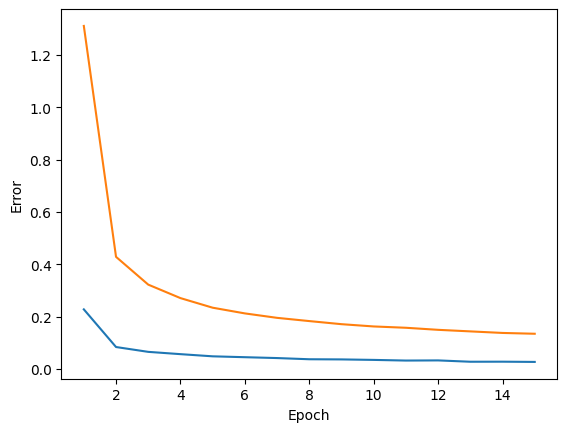

In [14]:
plt.plot(x,ans)
plt.plot(x,ans1)
plt.xlabel("Epoch")
plt.ylabel("Error")

In [17]:
ias=load_img('/content/4333865d4137a036d1a47bfa6ef5fc6b.jpeg')

In [15]:
from tensorflow.keras.utils import load_img

In [19]:
dsa=np.array(ias)

In [23]:
pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.9/944.9 kB 71.4 MB/s eta 0:00:00


In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

Using TensorFlow backend


In [29]:
inference_resizing = keras_cv.layers.Resizing(
    28, 28, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [36]:
dsa.shape

(594, 1000, 3)

In [37]:
dsa.shape

(594, 1000, 3)

In [38]:
image_batch= inference_resizing([dsa])

In [45]:
s=model.predict(image_batch)

1/1 [==============================] - 0s 33ms/step


In [46]:
s

array([[1.5008615e-08, 6.2519079e-27, 3.0430992e-37, 6.1413792e-19,
        0.0000000e+00, 4.1088995e-35, 7.6174341e-02, 0.0000000e+00,
        9.2382562e-01, 3.2385886e-34]], dtype=float32)